# ANALIZA PODATKOV KNJIG S PANDAS

## NALAGANJE PANDAS IN PODATKOV

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10
%matplotlib inline

In [477]:
knjige = pd.read_csv('.\knjige.csv', index_col='id')

## UVOD
Analizirala bom 9000 knjig iz kategorije 'Najboljše knjige 21. stoletja' na spletni strani goodreads (https://www.goodreads.com/list/show/7.Best_Books_of_the_21st_Century?page=91).

Za vsako knjigo sem zajela:
- Naslov knjige
- Avtorja
- Naslov zbirke in zaporedno st. knjige v zbirki (če je knjiga del ene)
- Uvrstitev knjige
- Id knjige
- Povprečno oceno bralcev
- Št. ocen
- Oceno knjige (na katero vpliva število glasov, ocene bralcev ipd.)
- Št. glasov

In [478]:
knjige

,uvrstitev,naslov,avtor,povp_ocena,st_ocen,ocena,st_glasov,zbirka,zap_st_knjige_v_zbirki
id,,,,,,,,,
136251,1,Harry Potter and the Deathly Hallows,J.K. Rowling,4.61,3105897,403410,4078,Harry Potter,7.0
2767052,2,The Hunger Games,Suzanne Collins,4.32,7026470,300983,3072,The Hunger Games,1.0
77203,3,The Kite Runner,Khaled Hosseini,4.31,2654813,265775,2699,NaN,NaN
19063,4,The Book Thief,Markus Zusak,4.38,2062063,259185,2640,NaN,NaN
1,5,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,2709360,225993,2327,Harry Potter,6.0
...,...,...,...,...,...,...,...,...,...
17706813,9095,The Return of the Omniscient Narrator: Author...,Paul Dawson,4.25,8,1,1,NaN,NaN
22928980,9095,The First Collection of Criticism by a Living ...,Jessica Hopper,4.01,1828,1,1,NaN,NaN
3688884,9095,"The Invention of Air: A Story of Science, Fait...",Steven Johnson,3.81,3040,1,1,NaN,NaN


Pri tem bom poskusila odgovoriti na naslednje hipoteze:
- Ali so bolj popularne knjige del zbirk?
- Ali število knjig v zbirki vpliva na popularnost?
- Ali so bolje ocenjene knjige tudi večkrat ocenjene?

## PROUČEVANJE PODATKOV

Ker bomo proučevali knjige glede na to ali so del kake zbirke ali ne najprej ustvarimo dve razpredelnici - eno s knjigami, ki so del zbirke, eno pa s tistimi, ki niso.

In [479]:
v_zbirki = knjige.dropna()
v_zbirki

,uvrstitev,naslov,avtor,povp_ocena,st_ocen,ocena,st_glasov,zbirka,zap_st_knjige_v_zbirki
id,,,,,,,,,
136251,1,Harry Potter and the Deathly Hallows,J.K. Rowling,4.61,3105897,403410,4078,Harry Potter,7.0
2767052,2,The Hunger Games,Suzanne Collins,4.32,7026470,300983,3072,The Hunger Games,1.0
1,5,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,2709360,225993,2327,Harry Potter,6.0
2,6,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,2795062,205245,2132,Harry Potter,5.0
6148028,10,Catching Fire,Suzanne Collins,4.30,2826143,150101,1575,The Hunger Games,2.0
...,...,...,...,...,...,...,...,...,...
11607446,9076,The Wishing Spell,Chris Colfer,4.24,113884,3,1,The Land of Stories,1.0
28186363,9076,Apprentice in Death,J.D. Robb,4.43,21496,3,1,In Death,43.0
17722973,9088,The Enchantress Returns,Chris Colfer,4.47,48437,2,1,The Land of Stories,2.0


In [480]:
niso_v_zbirki = knjige[knjige.isna().any(axis=1)]
niso_v_zbirki

,uvrstitev,naslov,avtor,povp_ocena,st_ocen,ocena,st_glasov,zbirka,zap_st_knjige_v_zbirki
id,,,,,,,,,
77203,3,The Kite Runner,Khaled Hosseini,4.31,2654813,265775,2699,NaN,NaN
19063,4,The Book Thief,Markus Zusak,4.38,2062063,259185,2640,NaN,NaN
4667024,7,The Help,Kathryn Stockett,4.46,2357013,168410,1742,NaN,NaN
128029,8,A Thousand Splendid Suns,Khaled Hosseini,4.39,1270499,165450,1694,NaN,NaN
4214,9,Life of Pi,Yann Martel,3.92,1439770,152204,1562,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6377338,9088,A Fiery Peace in a Cold War: Bernard Schriever...,Neil Sheehan,3.83,741,2,1,NaN,NaN
17706813,9095,The Return of the Omniscient Narrator: Author...,Paul Dawson,4.25,8,1,1,NaN,NaN
22928980,9095,The First Collection of Criticism by a Living ...,Jessica Hopper,4.01,1828,1,1,NaN,NaN


## HIPOTEZE

### 1. KNJIGE, KI SO DEL ZBIRKE, SO BOLJ POPULARNE

Pogledati želim, ali so knjige, ki so del neke zbirke bolj popularne od knjig, ki niso.

In [481]:
st_vseh_knjig = knjige['naslov'].count()
st_knjig_v_zbirki = v_zbirki['naslov'].count()
st_samostojnih_knjig = niso_v_zbirki['naslov'].count()
print (f'Št. vseh knjig = {st_vseh_knjig}')
print (f'Št. knjig v zbirkah = {st_knjig_v_zbirki}')
print (f'Št. samostojnih knjig = {st_samostojnih_knjig}')

Št. vseh knjig = 9099
Št. knjig v zbirkah = 3133
Št. samostojnih knjig = 5966


Popularnost knjige lahko ocenimo s pomočjo povprečne ocene (*povp_ocena*), ki jih podeljujejo bralci na petstopenjski lestvici, ter s pomočjo ocene (*ocena*), ki je izračunana na podlagi povprečnih ocen, števila ocen ipd. Ker je ta ocena izjemno razpršena (vrednosti so med 0 in 400000), se bom bolj osredotočila na povprečno oceno.

Kot vidimo že iz preprostih izračunov je samostojnih knjig veliko več kot knjig, ki so del zbirke, vendar sta oba vzorca zelo velika, zato bomo lahko primerjali ocene.

In [482]:
povp1 = niso_v_zbirki.mean(numeric_only=True)
povp2 = v_zbirki.mean(numeric_only=True)
print (f'Aritmetične sredine vrednosti za samostojne knjige: \n{povp1}\n')

print (f'Aritmetične sredine vrednosti za knjige, ki so del zbirke: \n{povp2}')

razlika = (povp2['ocena'] - povp1['ocena'])/4000
print (f'Razlika med ocenama: {razlika} %')

Aritmetične sredine vrednosti za samostojne knjige: 
uvrstitev                  4528.369930
povp_ocena                    3.957125
st_ocen                   33468.745558
ocena                       898.876634
st_glasov                     9.853000
zap_st_knjige_v_zbirki             NaN
dtype: float64

Aritmetične sredine vrednosti za knjige, ki so del zbirke: 
uvrstitev                  4408.182573
povp_ocena                    4.045238
st_ocen                   69846.022343
ocena                      1244.021066
st_glasov                    13.799872
zap_st_knjige_v_zbirki        3.900415
dtype: float64
Razlika med ocenama: 0.08628610795251182 %


Kot lahko vidimo, med povprečnima ocenama (3,957 za samostojne in 4,045 za knjige, ki so del zbirke) ni bistvene razlike. Na naslednjem grafu, kjer primerjamo povprečne ocene obeh skupin knjig, se zdi, da so knjige, ki so del zbirke nekoliko bolje ocenjene kot samostojne, vendar je razlika majhna saj je enota na x-osi velika.  
Med aritmetičnima sredinama ocen (898,877 za samostojne in 1244,021 za knjige, ki so del zbirke) je sicer nekoliko višja ocena, vendar moramo upoštevati, da je razpon ocen zelo velik. Razlika med tema ocenama je 0,086%, kar je zanemarljivo.  
Zaključimo lahko torej, da ni bistvene razlike med samostojnimi knjigami in knjigami, ki so del zbirke.

Text(0.5, 1.0, 'Povprečna ocena')

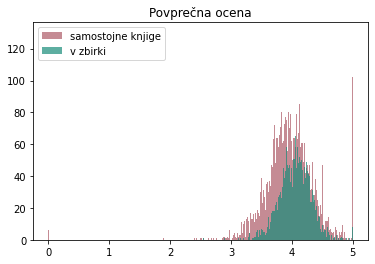

In [483]:
bins = np.linspace(0, 5, 500)
plt.hist(niso_v_zbirki['povp_ocena'], bins, alpha=0.5, label='samostojne knjige', color='#8c182b')
plt.hist(v_zbirki['povp_ocena'], bins, alpha=0.7, label='v zbirki', color='#188c79')
plt.legend(loc='upper left')
plt.title('Povprečna ocena')

Ogledamo si lahko še, katerih knjig je več med top 100 knjigami. Pri tem opazimo, da so knjige razvrščene glede na oceno *ocena*, torej so bolj popularne (oz. bolje ocenjene) knjige više na seznamu.

Text(0.5, 1.0, 'Uvrstitev prvih 100 knjig')

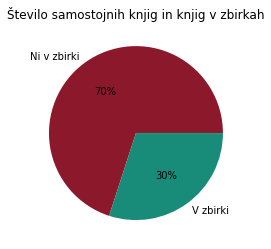

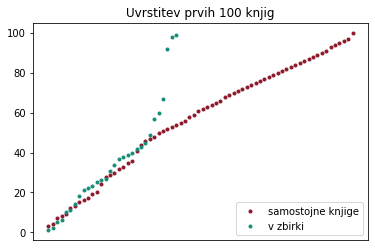

In [493]:
top100_niso = niso_v_zbirki[niso_v_zbirki['uvrstitev'] <= 100]
top100_so = v_zbirki[v_zbirki['uvrstitev'] <= 100]
st_top100_niso = top100_niso['naslov'].count()
st_top100_so = top100_so['naslov'].count()

ax1 = plt.subplot()
barve = ['#8c182b', '#188c79']
imena = ['Ni v zbirki', 'V zbirki']
vrednosti = [top100_niso['naslov'].count(), top100_so['naslov'].count()]
ax1.pie(vrednosti, labels=imena, autopct='%1.0f%%', colors=barve)
plt.title('Število samostojnih knjig in knjig v zbirkah')

ax2 = top100_niso.plot(x=1, y='uvrstitev', style='.', label='samostojne knjige', color='#8c182b')
top100_so.plot(ax=ax2, x=1, y='uvrstitev', style='.', label='v zbirki', color='#188c79').axes.get_xaxis().set_visible(False)
plt.legend(loc='lower right')
plt.title('Uvrstitev prvih 100 knjig')

Med top 100 knjigami je le 30 takšnih ki so del neke zbirke, torej lahko sklepamo da so te knjige manj popularne od tistih, ki niso v zbirki.  
Če pogledamo graf *Uvrstitev prvih 100 knjig*, ki prikazuje na katerih mestih so katere knjige, pa lahko vidimo, da je večina knjig, ki so del zbirke v prvi polovici - torej med prvimi 50 knjigami.

Iz tega lahko zaključimo, da ni bistvene razlike v popularnosti knjig glede na to ali so del zbirke ali ne. Če se osredotočimo le na top 100 knjig pa med njimi prevladujejo samostojne knjige.

### 2. DALJŠE ZBIRKE SO BOLJ POPULARNE

Sedaj se osredotočimo le na knjige, ki so del zbirke. Ogledali si bomo kako (če sploh) število knjig v zbirki vpliva na popularnost.  
Hitro lahko ugotovimo, da nekatere zbirke vsebujejo le eno knjigo, zato bomo te izločili - ogledali si bomo le zbirke ki vsebujejo vsaj dve knjigi.

In [485]:
stevilo_elementov = v_zbirki.groupby('zbirka').count()
dodano_st_knjig_v_zbirki = pd.merge(v_zbirki, stevilo_elementov['zap_st_knjige_v_zbirki'], on='zbirka')
dodano_st_knjig_v_zbirki = dodano_st_knjig_v_zbirki.rename(columns={'zap_st_knjige_v_zbirki_x': 'zap_st_knjige_v_zbirki', 'zap_st_knjige_v_zbirki_y': 'st_knjig_v_zbirki'})
vec_knjig = dodano_st_knjig_v_zbirki['st_knjig_v_zbirki'] > 1
vecje_zbirke = dodano_st_knjig_v_zbirki[vec_knjig]
vecje_zbirke

,uvrstitev,naslov,avtor,povp_ocena,st_ocen,ocena,st_glasov,zbirka,zap_st_knjige_v_zbirki,st_knjig_v_zbirki
0,1,Harry Potter and the Deathly Hallows,J.K. Rowling,4.61,3105897,403410,4078,Harry Potter,7.0,4
1,5,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,2709360,225993,2327,Harry Potter,6.0,4
2,6,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,2795062,205245,2132,Harry Potter,5.0,4
3,1079,Harry Potter and the Cursed Child: Parts One a...,John Tiffany,3.56,812522,393,6,Harry Potter,8.0,4
4,2,The Hunger Games,Suzanne Collins,4.32,7026470,300983,3072,The Hunger Games,1.0,4
...,...,...,...,...,...,...,...,...,...,...
3123,9051,Banewreaker,Jacqueline Carey,3.46,4333,5,1,The Sundering,1.0,2
3124,9063,Godslayer,Jacqueline Carey,3.71,3156,4,1,The Sundering,2.0,2
3130,9076,The Wishing Spell,Chris Colfer,4.24,113884,3,1,The Land of Stories,1.0,3
3131,9088,The Enchantress Returns,Chris Colfer,4.47,48437,2,1,The Land of Stories,2.0,3


Na tem mestu lahko opazimo da s podatki nekaj ni vredu (npr. zbirka Harry Potter naj bi vsebovala samo 4 knjige). Po podrobnejšem pregledu podatkov - tako csv tabele kot html kode lahko ugotovimo, da nekatere knjige, ki so del zbirke, na spletni strani tega nimajo dopisanega. Analizo bom kljub temu nadaljevala.

Text(0.5, 1.0, 'Korelacija med številom knjig v zbirki in popularnostjo')

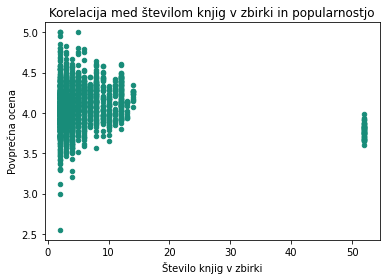

In [486]:
vecje_zbirke.plot.scatter(x='st_knjig_v_zbirki', y='povp_ocena', color='#188c79', xlabel='Število knjig v zbirki', ylabel='Povprečna ocena')
plt.title('Korelacija med številom knjig v zbirki in popularnostjo')

Na tem grafu ne opazimo neke očitne korelacije med številom knjig in popularnostjo. Vidimo lahko le, da več kot je knjig, bolj zgoščen je graf okrog neke vrednosti. To je morda zato, ker več kot je knjig, več je ocen za to zbirko, ocene za knjige iz iste zbirke pa so verjetno zelo podobne.

Zaključimo lahko, da število knjig v zbirki ne vpliva bistveno na njeno popularnost.

### 3. VIŠJE OCENJENE KNJIGE IMAJO VEČ OCEN

Zanima me, ali obstaja povezava med višino ocene in številom ocen, predvsem ali so bolj popularne knjige tudi večkrat ocenjene.

Text(0.5, 1.0, 'Korelacijski diagram med povprečno oceno in številom ocen')

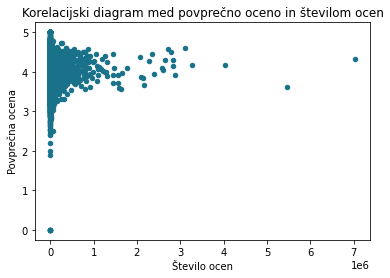

In [487]:
knjige.plot.scatter(x='st_ocen', y='povp_ocena', color='#19728a', xlabel='Število ocen', ylabel='Povprečna ocena')
plt.title('Korelacijski diagram med povprečno oceno in številom ocen')

Zdi se, da ne obstaja korelacija med številom ocen in povprečno oceno. Nekoliko slabše ocenjene (slabše od 3) knjige so sicer manjkrat ocenjene, med višje ocenjenimi pa ni bistvene razlike.

Text(0.5, 1.0, 'Korelacijski diagram med povprečno oceno in številom ocen top 100 knjig')

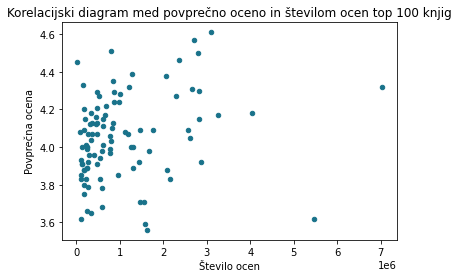

In [488]:
knjige.head(100).plot.scatter(x='st_ocen', y='povp_ocena', color='#19728a', xlabel='Število ocen', ylabel='Povprečna ocena')
plt.title('Korelacijski diagram med povprečno oceno in številom ocen top 100 knjig')

Tudi če si ogledamo le top 100 najbolj popularnih knjig ni opaziti nobene korelacije med številom ocen in povprečno oceno.

Zaključimo lahko, da število ocen in povprečna ocena nista povezani.

## ZAKLJUČEK

Glede na to, da podatki niso bili najboljši (saj nekatere knjige niso imele dopisane zbirke kateri pripadajo) tudi izsledki niso najbolj zanesljivi.   
Zdi se, da med najbolj popularnimi knjigami prevladujejo samostojne, torej tiste, ki niso del zbirke, bistvene razlike v popularnosti pa med vsemi 9099 knjigami ni.  
Ugotovili smo tudi, da število knjig v posamezni zbirki ne vpliva na popularnost knjig oz. zbirke. Opaziti je bilo zgoščenost okoli neke ocene pri zbirkah ki vsebujejo več knjig, ni pa več knjig pomenilo veliko višje ocene.  
Med popularnostjo knjige in številom ocen nismo ugotovili nobene povezave.